In [ ]:
help dbstop

# Checking regularity of paramteters

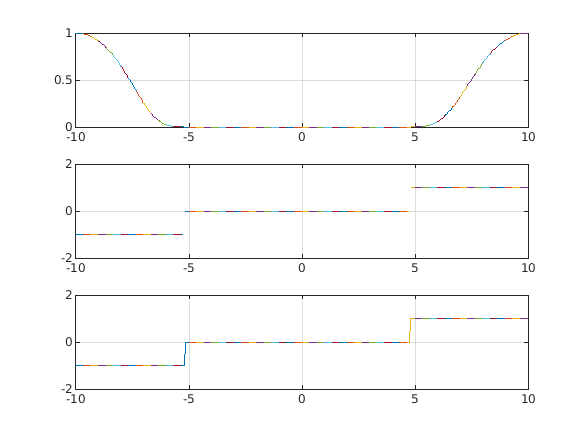

In [19]:
addpath('/home/sbishoyi_umassd_edu/phd_work/projects/aretakis_extremal_hair/codes/setup')
addpath('/home/sbishoyi_umassd_edu/phd_work/projects/single_hyperboloidal_layers/schwarzschild')
N=10; xL = -10; xR = 10; K = 60;

[Nv, VX, K, EToV] = MeshGen1D(xL,xR,K);
StartUp1D;

xmin = min(abs(x(1,:)-x(2,:)));
dg_globals.xmin=xmin;

locR2=-5; locR1=5;

%[idx1,idx2]=find_value_arr(x,locR2);
[idx1,idx2]=find(abs(x-locR2)<0.25);
idx1=idx1(1); idx2=idx2(1);
locR2=x(idx1,idx2);


%[idx3,idx4]=find_value_arr(x,locR1);
[idx3,idx4]=find(abs(x-locR1)<0.25);
idx3=idx3(1); idx4=idx4(1);
locR1=x(idx3,idx4);

F = (x-locR2)./(2*abs(x-locR2)) + (x-locR1)./(2*abs(x-locR1));
Fnew = -homeHVSD(locR2 - x) + homeHVSD(x - locR1);
s2=xL; s1=xR;
P=4;


omega = 1  - ( ( (x-locR2)./(s2-locR2) ).^P).*homeHVSD(locR2-x)  - ( ( (x-locR1)./(s1-locR1) ).^P).*homeHVSD(x-locR1);

omegaP = (-1).*(((-1).*locR2+s2).^(-1).*((-1).*locR2+x)).^P.*0 ...
                +(-1).*P.*((-1).*locR2+s2)^(-1).*(((-1).*locR2+s2).^(-1) ...
                *((-1).*locR2+x)).^((-1)+P).*homeHVSD(locR2-x) ...
        + (-1).*(((-1).*locR1+s1).^(-1).*((-1).*locR1+x)).^P.*0 ...
                +(-1).*P.*((-1).*locR1+s1)^(-1).*(((-1).*locR1+s1).^(-1) ...
                *((-1).*locR1+x)).^((-1)+P).*homeHVSD(x-locR1);
                
ohm = omega.^2./(omega - x.*omegaP);

capH   = 1-ohm;

rstar_adj = x./(omega);

subplot(3,1,1)
plot(x,capH)
grid()
subplot(3,1,2)
plot(x,F)
grid()
ylim([-2,2])
%xlim([3,4])
subplot(3,1,3)
plot(x,Fnew)
grid()
ylim([-2,2])

In [ ]:
locR1
locR2
F
Fnew

In [7]:
%rstar_adj(end-10:end)
x

x = 11x6 double
  -10.0000   -6.6667   -3.3333         0    3.3333    6.6667
   -9.8900   -6.5567   -3.2233    0.1100    3.4433    6.7767
   -9.6408   -6.3075   -2.9741    0.3592    3.6925    7.0259
   -9.2754   -5.9421   -2.6087    0.7246    4.0579    7.3913
   -8.8263   -5.4929   -2.1596    1.1737    4.5071    7.8404
   -8.3333   -5.0000   -1.6667    1.6667    5.0000    8.3333
   -7.8404   -4.5071   -1.1737    2.1596    5.4929    8.8263
   -7.3913   -4.0579   -0.7246    2.6087    5.9421    9.2754
   -7.0259   -3.6925   -0.3592    2.9741    6.3075    9.6408
   -6.7767   -3.4433   -0.1100    3.2233    6.5567    9.8900
...

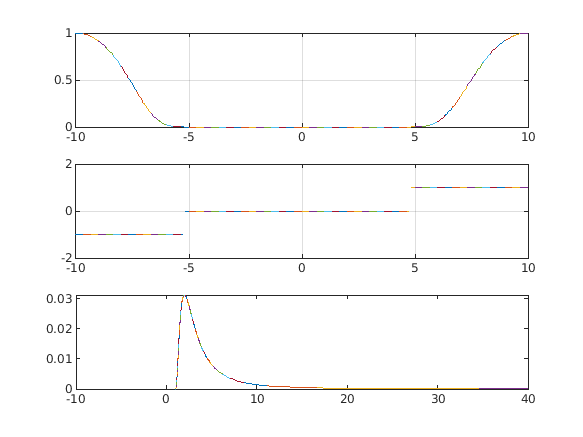

In [22]:
M=1; ell=0;
addpath('/home/sbishoyi_umassd_edu/phd_work/projects/aretakis_extremal_hair/codes/conversion')
r_ern=RstarToRwithCharge_Newton(rstar_adj,M); % -- changed on 12/22/23

%pot_sch=(1-2*M./r_sch).*(-2*M./(r_sch.^3) - ell*(ell+1)./r_sch.^2);


pot_ern=-(ell*(ell + 1)./r_ern.^4 + (2*M - 2*M^2./r_ern)./r_ern.^5).*...
     (r_ern.^2 -2*M.*r_ern + M^2); %-- checked on 12/22/23

Potential_eff = (1./((1-capH).*(1+capH))).*pot_ern;
Potential_eff(1,1)=double(0);

Potential=Potential_eff;

plot(r_ern,-pot_ern)
xlim([-10,40])

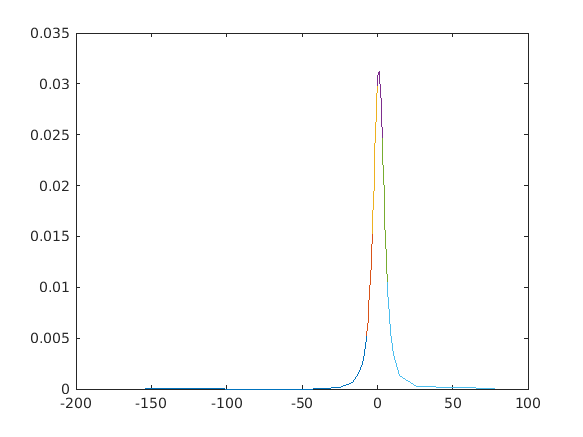

In [22]:
plot(rstar_adj,-pot_ern)